In [7]:
# gives us access to numerical calculations
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [136]:
# the data set X, it has a one in the first column such that Xw is of the form y = w_0 + w_1 * x 
X = np.array([[1, 1], 
              [1, 2.5], 
              [1, 3], 
              [1, 3.4], 
              [1,4]])

# the target values
y = np.array([1, 1.4, 2.5, 1.9, 3.2])


## Visualize the data

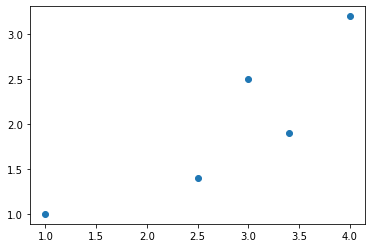

In [137]:
plot(X[:,1], y, 'o')

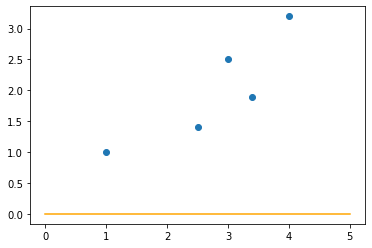

In [138]:
# a prediction based on the weight vector 0,0
w = np.array([0,0])

def plot_model_and_data(w, X, y):
    # make predictions for 1000 values between 0.0 and 5.0
    x_test = np.linspace(0, 5, 1000).reshape(-1,1)

    # also add the columns of ones
    X_test = np.hstack( (np.ones((len(x_test),1)), x_test))
    y_pred = np.dot(X_test, w)

    # plot the test data and the prediction data
    plot(X[:,1], y, 'o')
    plot(X_test[:,1], y_pred, 'orange')
    
plot_model_and_data(w, X, y)

## Try out different values of w yourself

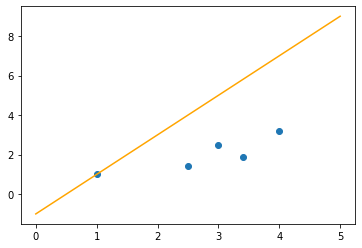

In [139]:
# for example 
w = np.array([-1, 2])
plot_model_and_data(w, X, y)

## Calculate the objective function / cost function -> MSE 
Let's first compare the predictions and targets

$$
\frac{1}{|D|} \sum_{<x,y> \in D} (y - f(x))^2 
$$

In [159]:
# the targets
print(y) 

# the predictions
w = np.array([-1, 2])
y_pred = np.dot(X, w)
print(y_pred) 

[1.  1.4 2.5 1.9 3.2]
[1.  4.  5.  5.8 7. ]


In [141]:
# take the component-wise differences
differences = y_pred - y
print(differences)

[0.  2.6 2.5 3.9 3.8]


In [142]:
# take the squares
diffs_squared = np.power(differences, 2)
print(diffs_squared)

[ 0.    6.76  6.25 15.21 14.44]


In [143]:
# sum them up 
sum_of_squares = np.sum(diffs_squared)
print(sum_of_squares)

42.66


In [39]:
# divide by the number of data points
mean_squared_error = sum_of_squares / X.shape[0]
print(mean_squared_error)

8.532


Now wrap all of that up in a function `mean_squared_error` that returns the cost for a given parameter vector `w`

In [144]:
def mean_squared_error(w, X, y):
    pass


def mean_squared_error(w, X, y):
    y_pred = np.dot(X, w)
    differences = y_pred - y
    diffs_squared = np.power(differences, 2)
    sum_of_squares = np.sum(diffs_squared)
    mse = sum_of_squares / X.shape[0]
    return mse

print(mean_squared_error(w, X, y))

8.532


Now try this again for different values of w, for example:

0.34534499999999996


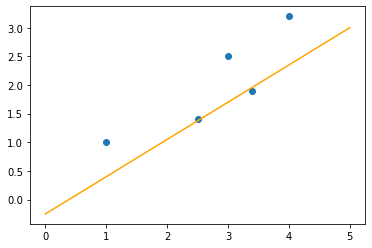

In [145]:
# for example 
w = np.array([-0.25, 0.65])
plot_model_and_data(w, X, y)
print(mean_squared_error(w, X, y))

## The simplest algorithm in the world -- just random guessing



The best weight is: [[ 2.09322908]
 [-0.05592092]] with mean squared error: 3.0955246557578056


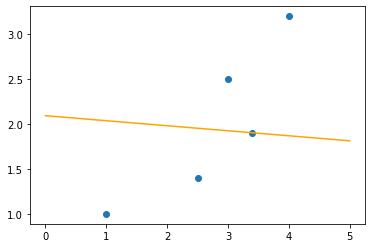

In [146]:
n_trials = 10000
w = np.array([0, 0])
best_so_far = mean_squared_error(w, X, y)
best_w = w

for i in range(n_trials):
    # draw a random weight vector between -2 and 2
    w = np.random.uniform(-5,5,[2,1]) # A 2x1 column vector
    mse = mean_squared_error(w, X, y)

    if mse < best_so_far:
        best_so_far = mse
        best_w = w
        
print(f"The best weight is: {best_w} with mean squared error: {best_so_far}")
plot_model_and_data(best_w, X, y)

A simple local search

Now  MSE is 8.692843935636418
Now  MSE is 4.972743975111138
Now  MSE is 3.6634481119953186
Now  MSE is 3.61383286031313
Now  MSE is 3.083008174336217
Now  MSE is 3.070241546118073
Now  MSE is 3.068731347853354
Now  MSE is 3.0607709046584355
Now  MSE is 3.060295202695968
Now  MSE is 3.0601871685286985
Now  MSE is 3.060089500563387
Now  MSE is 3.060025047760547
The best weight is: [[1.99620684e+00]
 [5.88651095e-04]] with mean squared error: 3.060025047760547


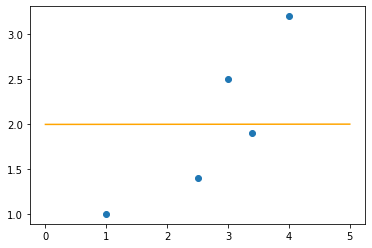

In [147]:
n_trials = 1000
w = np.array([0, 0]).reshape(-1,1)
current_mse = mean_squared_error(w, X, y)
current_w = w

for i in range(n_trials):
    # generate 100 small perturbations, take the best change
    for j in range(100):
        # draw a random weight vector between -2 and 2
        change_w = np.random.uniform(-1,1,[2,1]) # A 2x1 column vector
        candidate_w = current_w + change_w

        mse = mean_squared_error(candidate_w, X, y)
        if mse < current_mse:
            current_mse = mse
            current_w = candidate_w
            print(f"Now  MSE is {current_mse}")
            break

        
print(f"The best weight is: {current_w} with mean squared error: {current_mse}")
plot_model_and_data(current_w, X, y)

## Gradient update

Let's start with an arbitrary value:

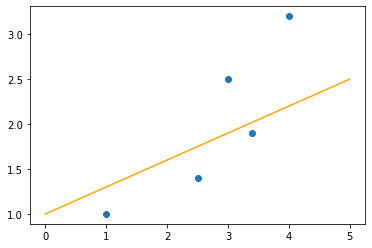

In [148]:
w = np.array([1, 0.3]).reshape(-1,1)
plot_model_and_data(w, X, y)
savefig("weight_1.png")

In [158]:
y_pred

array([[1.3 ],
       [1.75],
       [1.9 ],
       [2.02],
       [2.2 ]])

In [153]:
y_pred = np.dot(X,w)
diff = y_pred - y
loss = np.power(diff,2)

grads = np.zeros(2)

for i in range(X.shape[0]):
    print(X[i,:])
    print(y[i])
    print(y_pred[i])
    print(diff[i])
    print(loss[i])
    print("-----")
    grad_w0 = 2*diff[i]
    grad_w1 = 2*diff[i] * X[i,1]
    grads[0] = grads[0] + grad_w0
    grads[1] = grads[1] + grad_w1
    print(f"Grads: {grad_w0}, {grad_w1})")
    print("==========")
    
print("Overall")
print(grads)

[1. 1.]
1.0
[1.3]
[ 0.3 -0.1 -1.2 -0.6 -1.9]
[0.09 0.01 1.44 0.36 3.61]
-----


ValueError: setting an array element with a sequence.

In [120]:
grads

array([-1.66 , -8.434])

In [121]:
print(0.1 * grads)
w_new = w - 0.01 * grads.reshape(-1,1)
print(w_new)


[-0.166  -0.8434]
[[1.0166 ]
 [0.38434]]


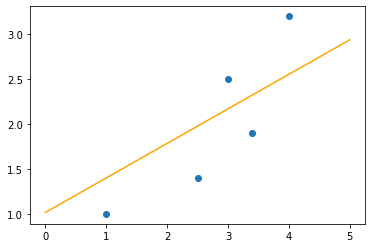

In [122]:
plot_model_and_data(w_new, X, y)
savefig("weight_2.png")

In [129]:
y_pred = np.dot(X,w)
diff = y_pred - y.reshape(-1,1)
loss = np.power(diff,2)

def get_gradient(w, X, y):    
    y_pred = np.dot(X, w)
    diff = y_pred - y
    
    grads = np.zeros(2)
    for i in range(X.shape[0]):
        grad_w0 = 2*diff[i]
        grad_w1 = 2*diff[i] * X[i,1]
        grads[0] += grad_w0
        grads[1] += grad_w1

    return grads.reshape(-1,1)

alpha = 0.01
w_new = w - alpha * get_gradient(w, X, y)
print(f"MSE before gradient update: {mean_squared_error(w, X,y)}")
print(f"MSE after gradient update: {mean_squared_error(w_new, X,y)}")

MSE before gradient update: 0.3173800000000001
MSE after gradient update: 0.2399900629672


In [132]:
print(f"MSE before gradient update: {mean_squared_error(w_new, X,y)}")
w_next = w_new - alpha * get_gradient(w_new, X, y)
print(f"MSE after gradient update: {mean_squared_error(w_next, X,y)}")

MSE before gradient update: 0.2399900629672
MSE after gradient update: 0.23795812724482074
